# Project Deliverable 1 - Group 33¶
#### Group Members: Bethany Findlay, Charlotte Albert, Kaykay Akpama, Kosi Udechukwu

# Dataset Choice
o Select one dataset challenge from the Kaggle pool (see below).

o Explain why your team chose this dataset: interest, feasibility, data type, potential for learning, etc.

# Data Dictionary
o Document the features (input variables) and target variable.

o Describe each feature in your own words using the Kaggle dataset description or metadata from other sources.

o Include units (if applicable) and note categorical vs. numerical variables.

# Exploratory Data Analysis (EDA)
o Summarize dataset size and structure.

o Provide descriptive statistics for numerical features.

o Show distributions and visualizations of key variables.

o Check for missing values, outliers, or anomalies.

o Explore correlations or relationships among features

Install dependencies and read dataset as df

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# read the CSV
df = pd.read_csv('train.csv')

# Summarize dataset size and structure
The dataset has the following columns:

- id (object): the unique identifier for each trip
- vendor_id (integer): the code indicating the provider associated with the trip record
- pickup_datetime (object): date and time when the meter was engaged
- dropoff_datetime (object): date and time when the meter was disengaged
- passenger_count (integer): the number of passengers in the vehicle, entered by driver
- pickup_longitude (float): longitude where the meter was engaged
- pickup_latitude (float): latitude where the meter was engaged
- dropoff_longitude (float): the longitude where the meter was disengaged
- dropoff_latitude (float): the latitude where the meter was disengaged
- store_and_fwd_flag (object): indicates whether the trip record was held in vehicle memory before sending to the vender because the vehicle did not have a connection to the server. Y = store and forward; N = not a store and forward trip
- trip_duration (int): duration of the trip in seconds

In [3]:
print(df.head())
# number of rows and columns
df.shape

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

(1458644, 11)

In [4]:
# show number of records in each column, type of data, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


 ## Provide descriptive statistics for numerical features

In [5]:
# statistical summary (count, mean, std, min, max, quartiles)
df.describe(include = "all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [6]:
# ensure the object data types are converted to standard datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')
# check if there are values that could not be converted
df['pickup_datetime'].isna().sum()
df['dropoff_datetime'].isna().sum()

np.int64(0)

## Show distributions and visualizations of key variables

Text(0, 0.5, 'Count')

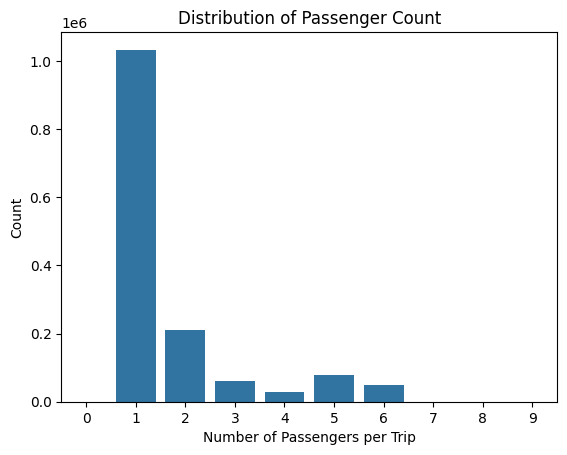

In [35]:
#plot passenger count 
sns.countplot(x='passenger_count',data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Number of Passengers per Trip')
plt.ylabel('Count')

### This plot shows the distribution of passenger counts for all taxi trips. Most rides have one passenger which indicates that individual travel is by far the most common. The number of passengers decreases sharply as passenger count increases showing that very few rides carry more than two people. 

Text(0, 0.5, 'Count')

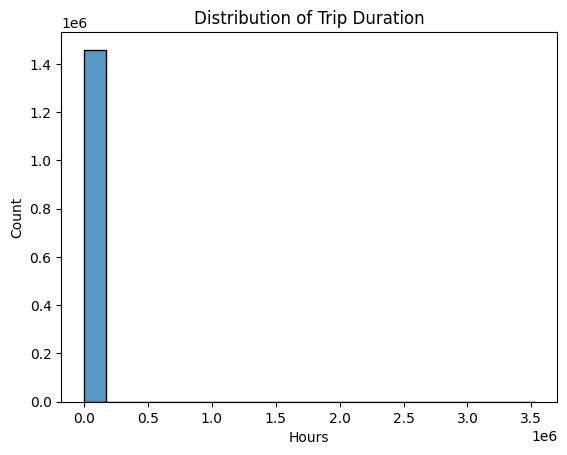

In [ ]:
#plot of trip duration 
sns.histplot(df['trip_duration'], kde=False, bins=20)
plt.title('Distribution of Trip Duration')
plt.xlabel('Hours')
plt.ylabel('Count')

### This plot shows the distribution of trip duration. Most trips have very short durations, indicating that the majority of rides were brief. However, the distribution is heavily skewed due to a few extremely large values. These outliers are not clearly visible in the plot but are confirmed in the descriptive statistics table for numerical features, which shows unusually high maximum trip durations likely caused by data entry or recording errors.

Text(0, 0.5, 'Count')

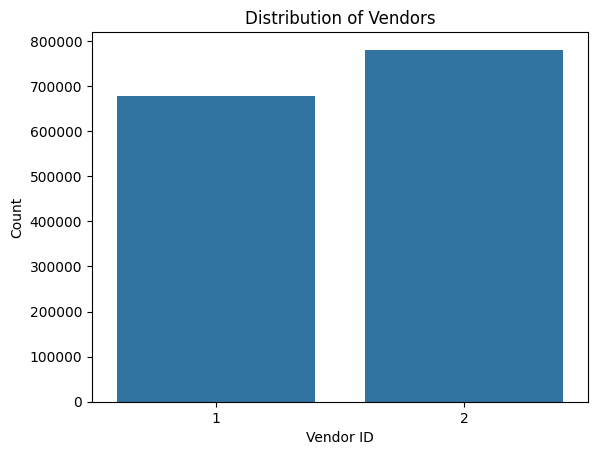

In [ ]:
#trips taken by individual vendors 
sns.countplot(x='vendor_id',data=df)
plt.title('Distribution of Vendors')
plt.xlabel('Vendor ID')
plt.ylabel('Count')

Text(0, 0.5, 'Number of Trips')

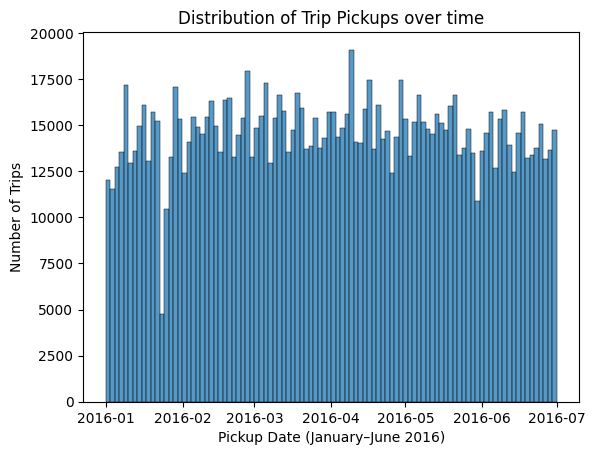

In [ ]:
#plot pickup date and time
sns.histplot(df['pickup_datetime'], bins=100)
plt.title('Distribution of Trip Pickups over time')
plt.xlabel('Pickup Date (January–June 2016)')
plt.ylabel('Number of Trips')

Text(0, 0.5, 'Number of Trips')

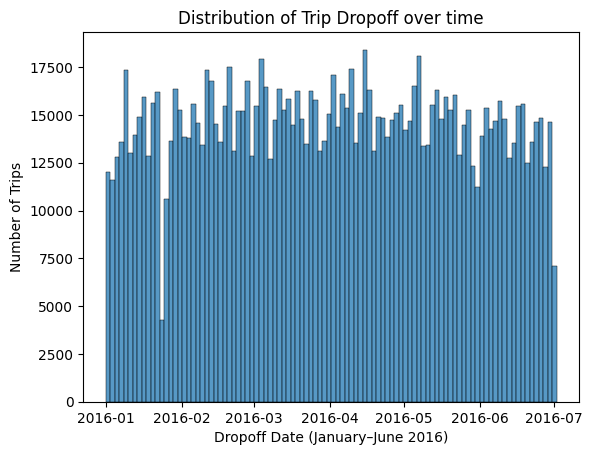

In [ ]:
#plot dropoff date and time
sns.histplot(df['dropoff_datetime'], bins=100)
plt.title('Distribution of Trip Dropoff over time')
plt.xlabel('Dropoff Date (January–June 2016)')
plt.ylabel('Number of Trips')

### The data indicates that trip pickups and dropoffs occurred consistently throughout the six-month period, with no significant spikes or drops in activity. This suggests steady taxi demand across time, which could indicate a stable transportation pattern during this period. Minor fluctuations may represent normal daily or weekly variations, but overall, there are no major irregularities or data gaps.

In [ ]:
#create new variables for pickup_day,dropoff_day,pickup_hour,dropoff_hour to get more insight on data
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour


### To gain deeper insights into trip patterns, new variables were created from the pickup_datetime and dropoff_datetime columns. The pickup_day and dropoff_day variables capture the day of the week for each trip, while pickup_hour and dropoff_hour represent the specific hour of the day. These additional features make it easier to analyze temporal trends such as peak hours, weekday versus weekend activity, and variations in trip behavior over time.

Text(0, 0.5, 'Number of Trip Pickups')

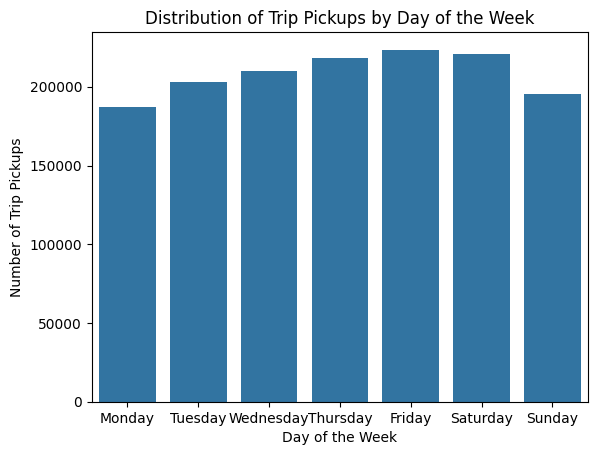

In [ ]:
#trips per day 
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='pickup_day', data=df, order=order)
plt.title('Distribution of Trip Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trip Pickups')

Text(0, 0.5, 'Number of Trip Dropoffs')

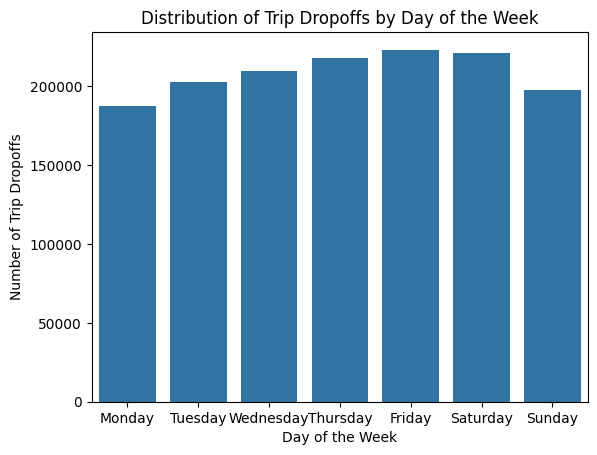

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='dropoff_day', data=df, order=order)
plt.title('Distribution of Trip Dropoffs by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trip Dropoffs')

### This plot distribution shows the pickup and dropoffs by the day of the week. The data shows that pick up and drop off is relatively consistent for the week, with higher numbers on Friday and Saturday. This trend aligns with typical travel behavior, suggesting increased demand toward the end of the week. The numbers drop on Sunday, which may reflect reduced activity before the start of the new work week. 

Text(0, 0.5, 'Number of Trip Pickups')

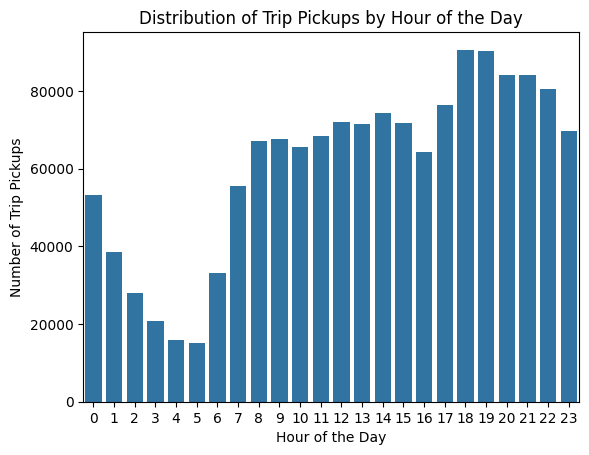

In [ ]:
#trips per hour
sns.countplot(x="pickup_hour",data=df)
plt.title('Distribution of Trip Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trip Pickups')

Text(0, 0.5, 'Number of Trip Pickups')

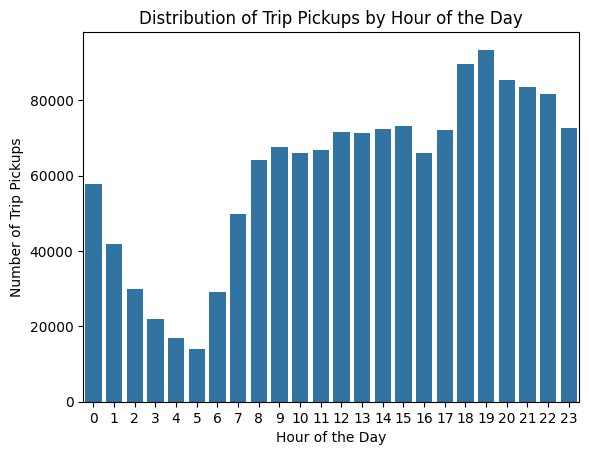

In [ ]:
sns.countplot(x="dropoff_hour",data=df)
plt.title('Distribution of Trip Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trip Pickups')

### The plots above show the distribution of pickup and dropoff by hour of the day. The data indicates that most trips occur between late morning and early event, with a peak around 6-8 PM. This pattern suggests higher taxi demands that align with the rush hour of New York. Fewer pickups and dropoffs are seen in the early morning hours (midnight to 6 AM), which is expected as overall transportation activity is lower during that time.

## Check for missing values, outliers, and anomalies

In [17]:
#identify passenger outliers(rows with 0,7,8,9 passenger count) 
data = df[(df['passenger_count'] != 0) & (df['passenger_count'] <= 6)]
data['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: count, dtype: int64

In [18]:
#identify the number of trips that were stored before forwarding (could produce potential anomalies) 
data['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994486
Y    0.005514
Name: proportion, dtype: float64

Text(0, 0.5, '')

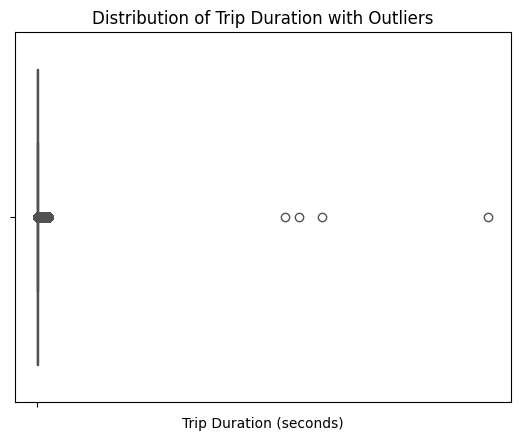

In [46]:
#identify outliers of trip duration 
sns.boxplot(df['trip_duration'])
sns.boxplot(x=df['trip_duration'])
plt.title('Distribution of Trip Duration with Outliers')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('')


In [20]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

## Explore relationships and correlations among features

Text(0, 0.5, 'Trip Duration')

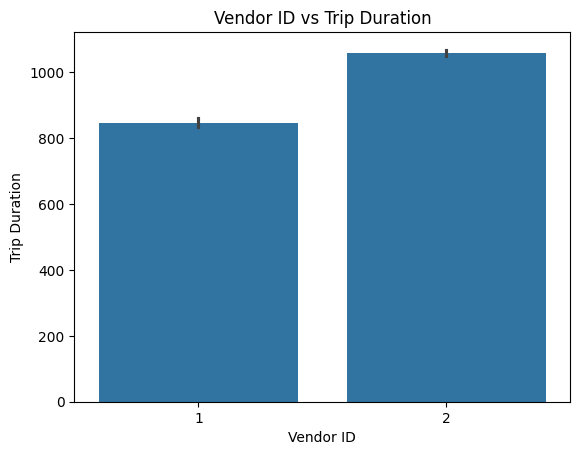

In [47]:
#Trip duration per vendor (vendor 2 takes longer trips)
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.title('Vendor ID vs Trip Duration')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')

Text(0, 0.5, 'Passenger Count')

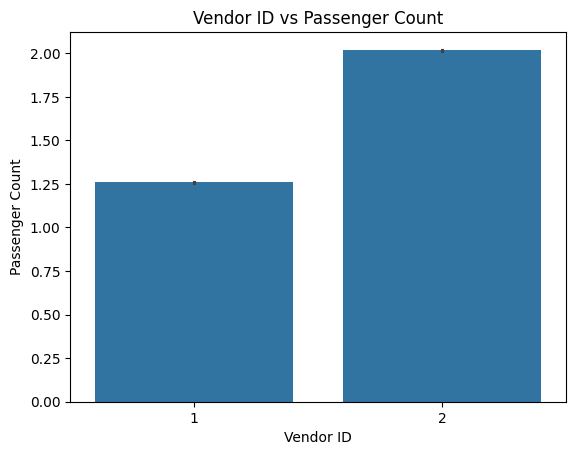

In [48]:
#Passenger count vs vendor (vendor 1 carries 1 passenger, vendor 2 carries 2 passengers usually)
sns.barplot(y='passenger_count',x='vendor_id',data=df)
plt.title('Vendor ID vs Passenger Count')
plt.xlabel('Vendor ID')
plt.ylabel('Passenger Count')

Text(30.61658950617285, 0.5, 'Trip Duration')

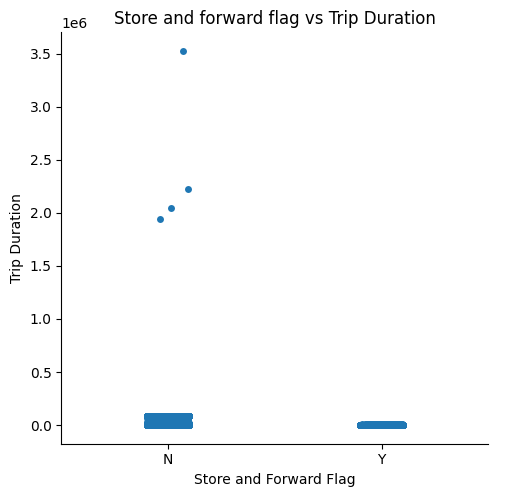

In [49]:
#Trip Duration per store and forward flag (trip duration is generally longer for trips whose flag is not stored)
sns.catplot(y='trip_duration', x='store_and_fwd_flag',data=df,kind='strip')
plt.title('Store and forward flag vs Trip Duration')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Trip Duration')

Text(30.61658950617285, 0.5, 'Trip Duration')

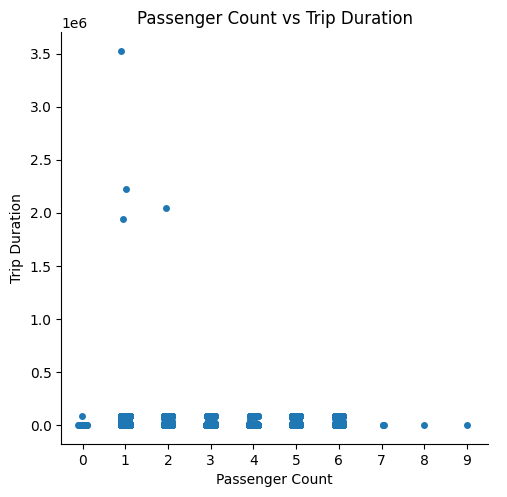

In [50]:
#Trip duration vs passenger count(no relationship?)
sns.catplot(y='trip_duration', x='passenger_count',data=df,kind='strip')
plt.title('Passenger Count vs Trip Duration')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')

Text(0, 0.5, 'Trip Duration')

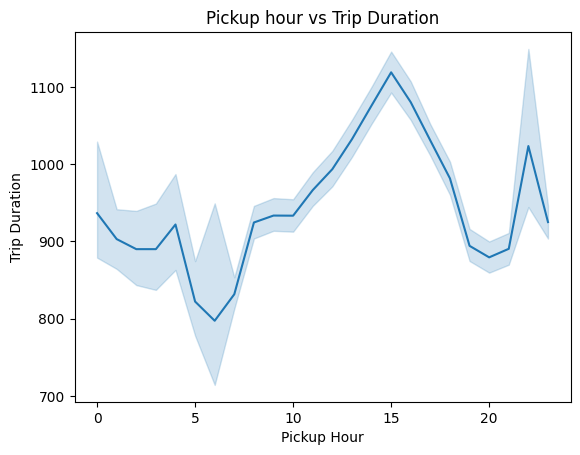

In [51]:
#trip duration vs time of day
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.title('Pickup hour vs Trip Duration')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration')

Text(0, 0.5, 'Trip Duration')

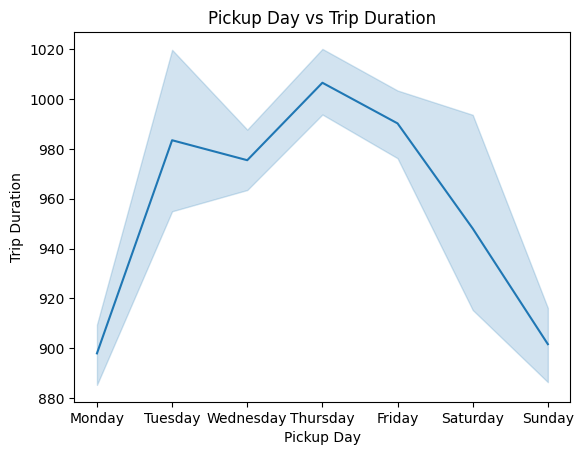

In [52]:
#trip duration vs day of week 
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=order, ordered=True)
sns.lineplot(x='pickup_day',y='trip_duration',data=df)
plt.title('Pickup Day vs Trip Duration')
plt.xlabel('Pickup Day')
plt.ylabel('Trip Duration')


## Check for target distribution

Text(0, 0.5, 'Count')

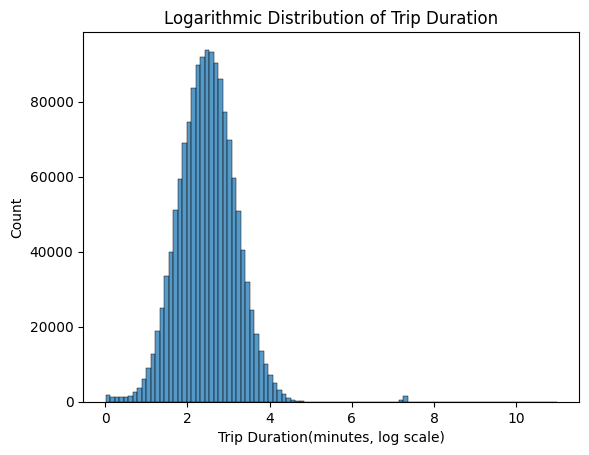

In [53]:
sns.histplot(np.log1p(df['trip_duration']/60), bins=100)
plt.title('Logarithmic Distribution of Trip Duration')
plt.xlabel('Trip Duration(minutes, log scale)')
plt.ylabel('Count')